# Experiment 

#### In this file, i implement Hyperparameter tuning which involves the process of optimizing the hyperparameters of a machine-learning model to achieve better performance.

### Reading file 

In [ ]:
import numpy as np 
import pandas as pd
from glob import glob 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing import image
import os
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout


# Define the paths to the train, test, and validation data
train_path = 'FDB/train'
test_path = 'FDB/test'
valid_path = 'FDB/validation'

# Define the image size and Batch size
IMAGE_SIZE = [224, 224]


# Get a list of folders in the train_path
folders = glob(os.path.join(train_path, '*'))

# Define the class labels based on your desired mapping
class_labels = ['0-3', '12+', '17+', '4+', '9+']

# Create a dictionary to map class labels to one-hot encodings
class_labels_dict = {label: [int(label == class_label) for class_label in class_labels] for label in class_labels}

# Print the class labels and their one-hot encodings
for class_label, hot_code in class_labels_dict.items():
    print(f'Class Label: {class_label} - Hot Code: {hot_code}')
print(class_labels)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2023-10-16 13:17:50.561142: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Class Label: 0-3 - Hot Code: [1, 0, 0, 0, 0]
Class Label: 12+ - Hot Code: [0, 1, 0, 0, 0]
Class Label: 17+ - Hot Code: [0, 0, 1, 0, 0]
Class Label: 4+ - Hot Code: [0, 0, 0, 1, 0]
Class Label: 9+ - Hot Code: [0, 0, 0, 0, 1]
['0-3', '12+', '17+', '4+', '9+']


## Experiment 1 Batch size = 64 

Found 7039 images belonging to 5 classes.
Found 1208 images belonging to 5 classes.
Found 1213 images belonging to 5 classes.


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 224, 224, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 401408)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               5138

2023-10-16 01:12:23.949087: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


110/110 [==============================] - ETA: 0s - loss: 1.4614 - accuracy: 0.5300

2023-10-16 01:15:59.579739: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


110/110 [==============================] - 223s 2s/step - loss: 1.4614 - accuracy: 0.5300 - val_loss: 1.2052 - val_accuracy: 0.7003 - lr: 0.0010
Epoch 2/30
110/110 [==============================] - 206s 2s/step - loss: 0.8907 - accuracy: 0.6718 - val_loss: 1.0103 - val_accuracy: 0.7152 - lr: 0.0010
Epoch 3/30
110/110 [==============================] - 205s 2s/step - loss: 0.6626 - accuracy: 0.7477 - val_loss: 0.9955 - val_accuracy: 0.5820 - lr: 0.0010
Epoch 4/30
110/110 [==============================] - 107s 967ms/step - loss: 0.5180 - accuracy: 0.7883 - val_loss: 0.6918 - val_accuracy: 0.7343 - lr: 0.0010
Epoch 5/30
110/110 [==============================] - 105s 950ms/step - loss: 0.4070 - accuracy: 0.8436 - val_loss: 1.1291 - val_accuracy: 0.6175 - lr: 0.0010
Epoch 6/30
110/110 [==============================] - 99s 899ms/step - loss: 0.3066 - accuracy: 0.8859 - val_loss: 1.9715 - val_accuracy: 0.3071 - lr: 0.0010
Epoch 7/30
110/110 [==============================] - 100s 905ms/st

2023-10-16 01:57:06.190508: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


19/19 [==============================] - 7s 349ms/step - loss: 0.4943 - accuracy: 0.8228
Test Loss: 0.49432387948036194
Test Accuracy: 0.8227534890174866
2/2 [==============================] - 1s 222ms/step


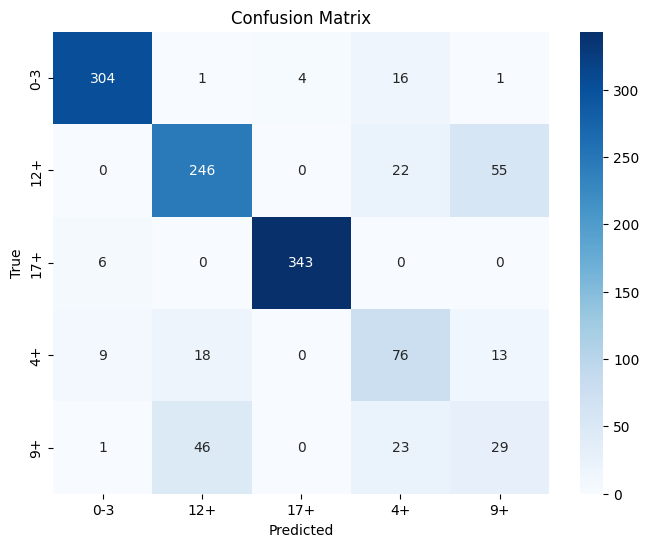

              precision    recall  f1-score   support

         0-3       0.95      0.93      0.94       326
         12+       0.79      0.76      0.78       323
         17+       0.99      0.98      0.99       349
          4+       0.55      0.66      0.60       116
          9+       0.30      0.29      0.29        99

    accuracy                           0.82      1213
   macro avg       0.72      0.73      0.72      1213
weighted avg       0.83      0.82      0.82      1213



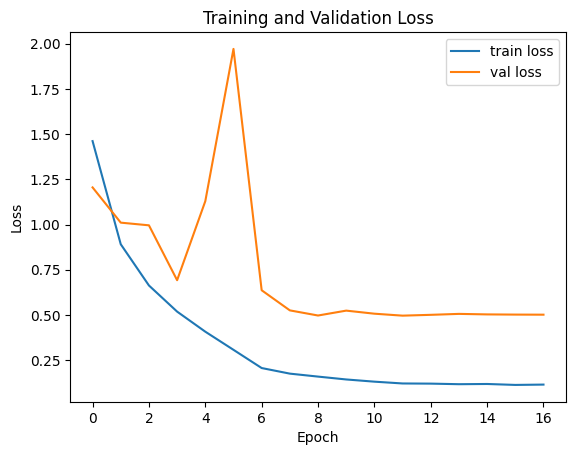

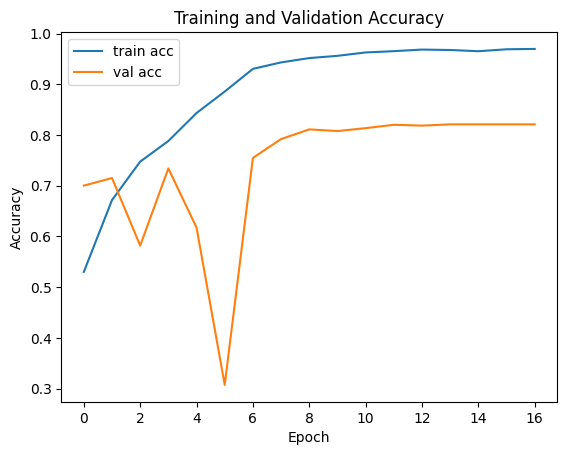

In [5]:

# Define the batch size
batch_size = 64


# Pixel Value Normalization , it rescales the pixel values so that they fall within the range [0, 1].
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data Generators
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size=IMAGE_SIZE,
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

validation_set = validation_datagen.flow_from_directory(valid_path,
                                                       target_size=IMAGE_SIZE,
                                                       batch_size=batch_size,
                                                       class_mode='categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                           target_size=IMAGE_SIZE,
                                           batch_size=batch_size,
                                           class_mode='categorical')

#---------------------------------------------------------------------------------


# Building the model
input_layer = Input(shape=(224, 224, 3))

# Convolutional Block 1
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

# Flatten and Fully Connected Layers with Dropout
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Output Layer
output_layer = Dense(5, activation='softmax')(x)  # Assuming 5 classes

# Create the model
model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

# Compiling the Model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()
#---------------------------------------------------------------------------------

# Early Stopping and Learning Rate Schedule  May delete it?
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=1e-7)

#---------------------------------------------------------------------------------

epochs = 30
history = model.fit(
    training_set,
    steps_per_epoch=len(training_set),
    validation_data=validation_set,
    validation_steps=len(validation_set),
    epochs=epochs,
    callbacks=[early_stopping, reduce_lr]
)
#---------------------------------------------------------------------------------
# Evaluate the Model on the Test Set
test_loss, test_acc = model.evaluate(test_set, steps=len(test_set))
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')



# Model Evaluation and Confusion Matrix

# Initialize variables to store true and predicted labels
true_labels = []
predicted_labels = []

# Loop through the test set and make predictions
for i in range(len(test_set)):
    images, labels = test_set[i]
    true_labels.extend(np.argmax(labels, axis=1))
    predictions = model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))

# Convert the lists to numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Create the confusion matrix
confusion_mtx = confusion_matrix(true_labels, predicted_labels)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Generate a classification report
report = classification_report(true_labels, predicted_labels, target_names=class_labels)
print(report)

#---------------------------------------------------------------------------------

# Plotting Loss Curves
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

# Plotting Accuracy Curves
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()

#---------------------------------------------------------------------------------

# Saving the Model
model.save('FE1.h5')



## Experiment 1: part2 Batch size = 32 

Found 7039 images belonging to 5 classes.
Found 1208 images belonging to 5 classes.
Found 1213 images belonging to 5 classes.


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_6 (Batc  (None, 224, 224, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 401408)            0         
                                                                 
 dense_6 (Dense)             (None, 128)               5138

2023-10-16 01:57:27.603477: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Epoch 1/30
220/220 [==============================] - ETA: 0s - loss: 1.3869 - accuracy: 0.5390

2023-10-16 02:00:45.629343: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


220/220 [==============================] - 206s 920ms/step - loss: 1.3869 - accuracy: 0.5390 - val_loss: 1.1909 - val_accuracy: 0.5224 - lr: 0.0010
Epoch 2/30
220/220 [==============================] - 200s 911ms/step - loss: 0.8822 - accuracy: 0.6654 - val_loss: 0.8061 - val_accuracy: 0.6705 - lr: 0.0010
Epoch 3/30
220/220 [==============================] - 204s 925ms/step - loss: 0.6378 - accuracy: 0.7510 - val_loss: 0.7286 - val_accuracy: 0.6945 - lr: 0.0010
Epoch 4/30
220/220 [==============================] - 232s 1s/step - loss: 0.4512 - accuracy: 0.8290 - val_loss: 0.5804 - val_accuracy: 0.7748 - lr: 0.0010
Epoch 5/30
220/220 [==============================] - 217s 985ms/step - loss: 0.3850 - accuracy: 0.8510 - val_loss: 0.8289 - val_accuracy: 0.7467 - lr: 0.0010
Epoch 6/30
220/220 [==============================] - 200s 908ms/step - loss: 0.2490 - accuracy: 0.9112 - val_loss: 1.2838 - val_accuracy: 0.6821 - lr: 0.0010
Epoch 7/30
220/220 [==============================] - 194s 8

2023-10-16 02:41:03.859525: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


38/38 [==============================] - 8s 204ms/step - loss: 0.5241 - accuracy: 0.8071
Test Loss: 0.5241323709487915
Test Accuracy: 0.8070898652076721
1/1 [==============================] - 0s 295ms/step


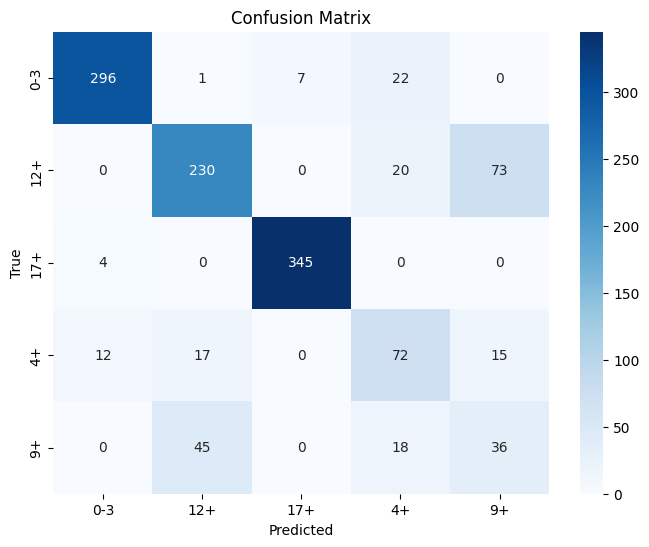

              precision    recall  f1-score   support

         0-3       0.95      0.91      0.93       326
         12+       0.78      0.71      0.75       323
         17+       0.98      0.99      0.98       349
          4+       0.55      0.62      0.58       116
          9+       0.29      0.36      0.32        99

    accuracy                           0.81      1213
   macro avg       0.71      0.72      0.71      1213
weighted avg       0.82      0.81      0.81      1213



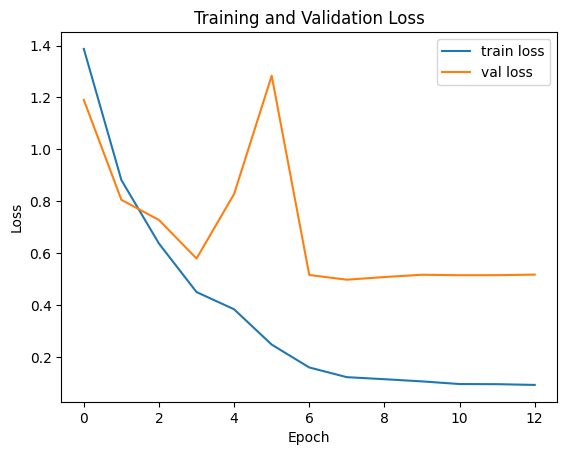

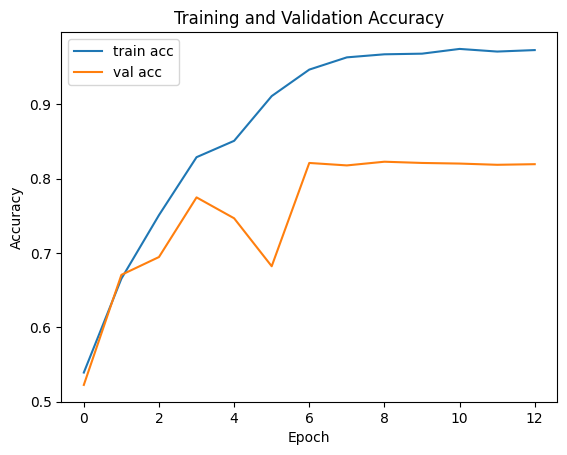

In [6]:

# Define the batch size
batch_size = 32


# Pixel Value Normalization , it rescales the pixel values so that they fall within the range [0, 1].
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data Generators
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size=IMAGE_SIZE,
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

validation_set = validation_datagen.flow_from_directory(valid_path,
                                                       target_size=IMAGE_SIZE,
                                                       batch_size=batch_size,
                                                       class_mode='categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                           target_size=IMAGE_SIZE,
                                           batch_size=batch_size,
                                           class_mode='categorical')

#---------------------------------------------------------------------------------


# Building the model
input_layer = Input(shape=(224, 224, 3))

# Convolutional Block 1
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

# Flatten and Fully Connected Layers with Dropout
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Output Layer
output_layer = Dense(5, activation='softmax')(x)  # Assuming 5 classes

# Create the model
model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

# Compiling the Model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()
#---------------------------------------------------------------------------------

# Early Stopping and Learning Rate Schedule
rearly_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=1e-7)

#---------------------------------------------------------------------------------

epochs = 30
history = model.fit(
    training_set,
    steps_per_epoch=len(training_set),
    validation_data=validation_set,
    validation_steps=len(validation_set),
    epochs=epochs,
    callbacks=[early_stopping, reduce_lr]
)
#---------------------------------------------------------------------------------
# Evaluate the Model on the Test Set
test_loss, test_acc = model.evaluate(test_set, steps=len(test_set))
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')



# Model Evaluation and Confusion Matrix

# Initialize variables to store true and predicted labels
true_labels = []
predicted_labels = []

# Loop through the test set and make predictions
for i in range(len(test_set)):
    images, labels = test_set[i]
    true_labels.extend(np.argmax(labels, axis=1))
    predictions = model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))

# Convert the lists to numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Create the confusion matrix
confusion_mtx = confusion_matrix(true_labels, predicted_labels)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Generate a classification report
report = classification_report(true_labels, predicted_labels, target_names=class_labels)
print(report)

#---------------------------------------------------------------------------------

# Plotting Loss Curves
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

# Plotting Accuracy Curves
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()

#---------------------------------------------------------------------------------

# Saving the Model
model.save('FE2.h5')



## Results best one is:

Both models show good accuracy on the test set, but Model 1 (with a batch size of 64) slightly outperforms Model 2 (with a batch size of 32) in terms of 9+ class

Bacth size = 64 
almost the same Choose the 32

# -------------------------------------------------

## Experiment 2,  droup out 0.7

Found 7039 images belonging to 5 classes.
Found 1208 images belonging to 5 classes.
Found 1213 images belonging to 5 classes.


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_8 (Batc  (None, 224, 224, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 401408)            0         
                                                                 
 dense_8 (Dense)             (None, 128)               5138

2023-10-16 02:41:27.787787: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Epoch 1/30
220/220 [==============================] - ETA: 0s - loss: 1.7573 - accuracy: 0.4842

2023-10-16 02:44:47.681028: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


220/220 [==============================] - 208s 934ms/step - loss: 1.7573 - accuracy: 0.4842 - val_loss: 1.0793 - val_accuracy: 0.6548 - lr: 0.0010
Epoch 2/30
220/220 [==============================] - 203s 924ms/step - loss: 1.0933 - accuracy: 0.6068 - val_loss: 0.9421 - val_accuracy: 0.6813 - lr: 0.0010
Epoch 3/30
220/220 [==============================] - 205s 934ms/step - loss: 0.8624 - accuracy: 0.6690 - val_loss: 1.5143 - val_accuracy: 0.6407 - lr: 0.0010
Epoch 4/30
220/220 [==============================] - 263s 1s/step - loss: 0.7258 - accuracy: 0.7078 - val_loss: 0.5850 - val_accuracy: 0.7748 - lr: 0.0010
Epoch 5/30
220/220 [==============================] - 273s 1s/step - loss: 0.5800 - accuracy: 0.7616 - val_loss: 0.6070 - val_accuracy: 0.7798 - lr: 0.0010
Epoch 6/30
220/220 [==============================] - 278s 1s/step - loss: 0.5057 - accuracy: 0.8001 - val_loss: 0.8096 - val_accuracy: 0.7194 - lr: 0.0010
Epoch 7/30
220/220 [==============================] - 275s 1s/step

2023-10-16 03:43:23.145843: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


38/38 [==============================] - 8s 199ms/step - loss: 0.4256 - accuracy: 0.8302
Test Loss: 0.4256365895271301
Test Accuracy: 0.830173134803772
1/1 [==============================] - 0s 331ms/step


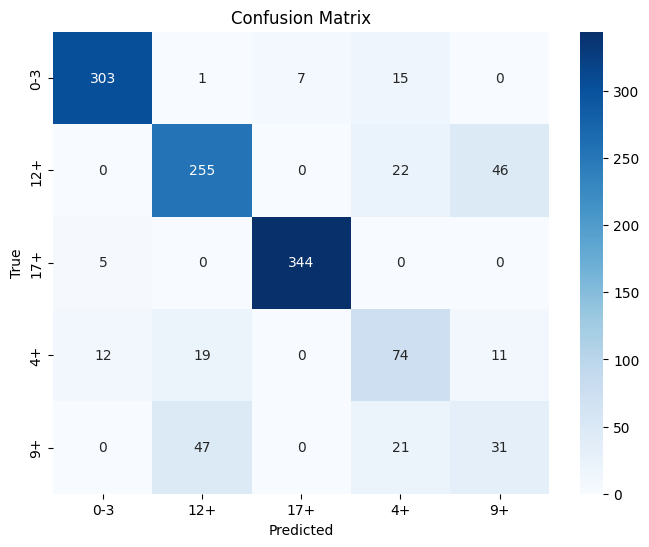

              precision    recall  f1-score   support

         0-3       0.95      0.93      0.94       326
         12+       0.79      0.79      0.79       323
         17+       0.98      0.99      0.98       349
          4+       0.56      0.64      0.60       116
          9+       0.35      0.31      0.33        99

    accuracy                           0.83      1213
   macro avg       0.73      0.73      0.73      1213
weighted avg       0.83      0.83      0.83      1213



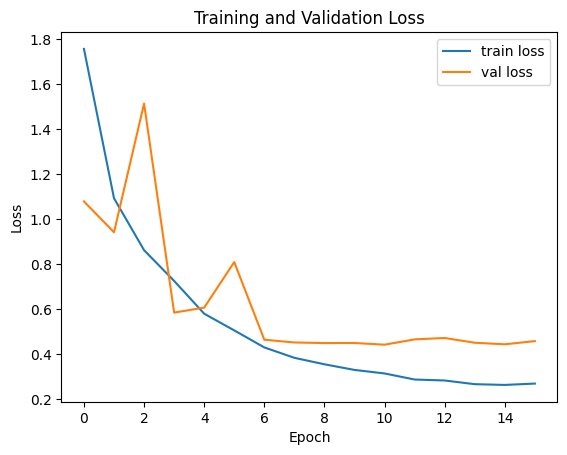

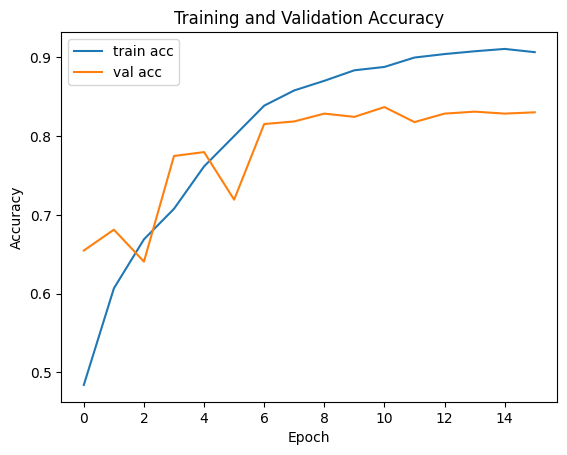

In [7]:

# Define the batch size
batch_size = 32


# Pixel Value Normalization , it rescales the pixel values so that they fall within the range [0, 1].
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data Generators
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size=IMAGE_SIZE,
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

validation_set = validation_datagen.flow_from_directory(valid_path,
                                                       target_size=IMAGE_SIZE,
                                                       batch_size=batch_size,
                                                       class_mode='categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                           target_size=IMAGE_SIZE,
                                           batch_size=batch_size,
                                           class_mode='categorical')

#---------------------------------------------------------------------------------


# Building the model
input_layer = Input(shape=(224, 224, 3))

# Convolutional Block 1
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

# Flatten and Fully Connected Layers with Dropout
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.7)(x)

# Output Layer
output_layer = Dense(5, activation='softmax')(x)  # Assuming 5 classes

# Create the model
model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

# Compiling the Model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()
#---------------------------------------------------------------------------------

# Early Stopping and Learning Rate Schedule 
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=1e-7)

#---------------------------------------------------------------------------------

epochs = 30
history = model.fit(
    training_set,
    steps_per_epoch=len(training_set),
    validation_data=validation_set,
    validation_steps=len(validation_set),
    epochs=epochs,
    callbacks=[early_stopping, reduce_lr]
)
#---------------------------------------------------------------------------------
# Evaluate the Model on the Test Set
test_loss, test_acc = model.evaluate(test_set, steps=len(test_set))
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')



# Model Evaluation and Confusion Matrix

# Initialize variables to store true and predicted labels
true_labels = []
predicted_labels = []

# Loop through the test set and make predictions
for i in range(len(test_set)):
    images, labels = test_set[i]
    true_labels.extend(np.argmax(labels, axis=1))
    predictions = model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))

# Convert the lists to numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Create the confusion matrix
confusion_mtx = confusion_matrix(true_labels, predicted_labels)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Generate a classification report
report = classification_report(true_labels, predicted_labels, target_names=class_labels)
print(report)

#---------------------------------------------------------------------------------

# Plotting Loss Curves
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

# Plotting Accuracy Curves
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()

#---------------------------------------------------------------------------------

# Saving the Model
model.save('FE3.h5') 



# Results : take 0.7 less gap 

## If remove the early stop

# -------------------------------------------------
# Experiment 3,  Remove the early stop

Found 7039 images belonging to 5 classes.
Found 1208 images belonging to 5 classes.
Found 1213 images belonging to 5 classes.


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_5 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_10 (Bat  (None, 224, 224, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 401408)            0         
                                                                 
 dense_10 (Dense)            (None, 128)               5138

2023-10-16 03:43:47.167080: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


220/220 [==============================] - ETA: 0s - loss: 1.7887 - accuracy: 0.4731

2023-10-16 03:46:58.379640: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


220/220 [==============================] - 199s 892ms/step - loss: 1.7887 - accuracy: 0.4731 - val_loss: 1.3669 - val_accuracy: 0.4123
Epoch 2/30
220/220 [==============================] - 193s 877ms/step - loss: 1.0875 - accuracy: 0.6150 - val_loss: 0.9518 - val_accuracy: 0.6747
Epoch 3/30
220/220 [==============================] - 191s 868ms/step - loss: 0.8079 - accuracy: 0.6889 - val_loss: 0.6899 - val_accuracy: 0.7177
Epoch 4/30
220/220 [==============================] - 192s 870ms/step - loss: 0.6953 - accuracy: 0.7291 - val_loss: 0.4983 - val_accuracy: 0.8220
Epoch 5/30
220/220 [==============================] - 193s 876ms/step - loss: 0.5662 - accuracy: 0.7788 - val_loss: 0.5551 - val_accuracy: 0.7864
Epoch 6/30
220/220 [==============================] - 193s 876ms/step - loss: 0.4773 - accuracy: 0.8150 - val_loss: 1.3101 - val_accuracy: 0.5795
Epoch 7/30
220/220 [==============================] - 195s 883ms/step - loss: 0.4402 - accuracy: 0.8346 - val_loss: 5.7011 - val_accura

2023-10-16 05:05:16.058508: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


38/38 [==============================] - 5s 142ms/step - loss: 0.9720 - accuracy: 0.7725
Test Loss: 0.9720134139060974
Test Accuracy: 0.7724649906158447
1/1 [==============================] - 0s 194ms/step


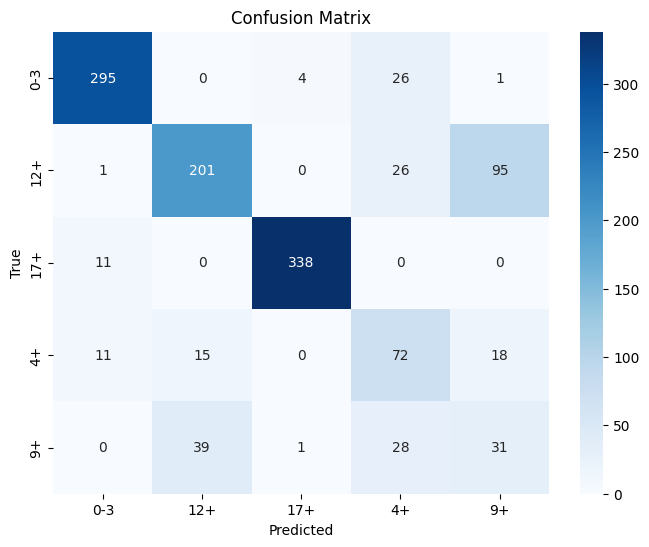

              precision    recall  f1-score   support

         0-3       0.93      0.90      0.92       326
         12+       0.79      0.62      0.70       323
         17+       0.99      0.97      0.98       349
          4+       0.47      0.62      0.54       116
          9+       0.21      0.31      0.25        99

    accuracy                           0.77      1213
   macro avg       0.68      0.69      0.68      1213
weighted avg       0.81      0.77      0.78      1213



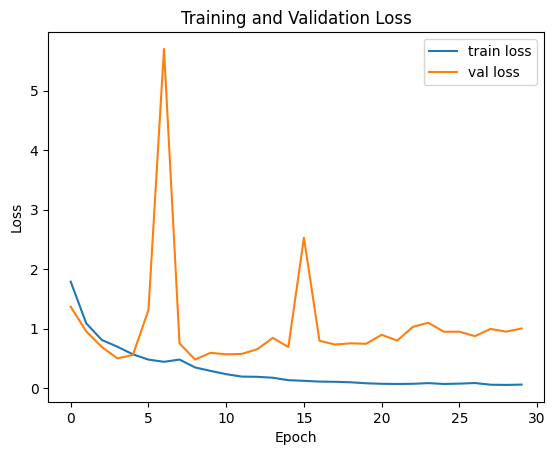

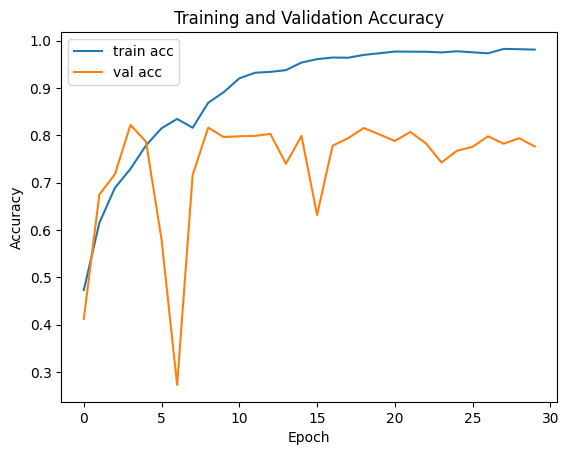

In [8]:

# Define the batch size
batch_size = 32


# Pixel Value Normalization , it rescales the pixel values so that they fall within the range [0, 1].
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data Generators
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size=IMAGE_SIZE,
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

validation_set = validation_datagen.flow_from_directory(valid_path,
                                                       target_size=IMAGE_SIZE,
                                                       batch_size=batch_size,
                                                       class_mode='categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                           target_size=IMAGE_SIZE,
                                           batch_size=batch_size,
                                           class_mode='categorical')

#---------------------------------------------------------------------------------


# Building the model
input_layer = Input(shape=(224, 224, 3))

# Convolutional Block 1
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

# Flatten and Fully Connected Layers with Dropout
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.7)(x)

# Output Layer
output_layer = Dense(5, activation='softmax')(x)  # Assuming 5 classes

# Create the model
model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

# Compiling the Model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()
#---------------------------------------------------------------------------------
epochs = 30
history = model.fit(
    training_set,
    steps_per_epoch=len(training_set),
    validation_data=validation_set,
    validation_steps=len(validation_set),
    epochs=epochs
)
#---------------------------------------------------------------------------------
# Evaluate the Model on the Test Set
test_loss, test_acc = model.evaluate(test_set, steps=len(test_set))
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')



# Model Evaluation and Confusion Matrix

# Initialize variables to store true and predicted labels
true_labels = []
predicted_labels = []

# Loop through the test set and make predictions
for i in range(len(test_set)):
    images, labels = test_set[i]
    true_labels.extend(np.argmax(labels, axis=1))
    predictions = model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))

# Convert the lists to numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Create the confusion matrix
confusion_mtx = confusion_matrix(true_labels, predicted_labels)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Generate a classification report
report = classification_report(true_labels, predicted_labels, target_names=class_labels)
print(report)

#---------------------------------------------------------------------------------

# Plotting Loss Curves
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

# Plotting Accuracy Curves
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()

#---------------------------------------------------------------------------------

# Saving the Model
model.save('FE4.h5')

## this one is the best , or the second one 


# Results = Not that much differ keep it better

# Experment 4 / Add Data augmentioin 

Found 7039 images belonging to 5 classes.
Found 1208 images belonging to 5 classes.
Found 1213 images belonging to 5 classes.


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_12 (Bat  (None, 224, 224, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 401408)            0         
                                                                 
 dense_12 (Dense)            (None, 128)               5138

2023-10-16 05:05:31.166274: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


220/220 [==============================] - ETA: 0s - loss: 1.8351 - accuracy: 0.4491

2023-10-16 05:07:33.842549: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


220/220 [==============================] - 128s 576ms/step - loss: 1.8351 - accuracy: 0.4491 - val_loss: 1.3633 - val_accuracy: 0.4081 - lr: 0.0010
Epoch 2/30
220/220 [==============================] - 127s 576ms/step - loss: 1.2830 - accuracy: 0.5529 - val_loss: 1.1137 - val_accuracy: 0.5952 - lr: 0.0010
Epoch 3/30
220/220 [==============================] - 127s 574ms/step - loss: 1.0680 - accuracy: 0.5957 - val_loss: 0.9673 - val_accuracy: 0.6474 - lr: 0.0010
Epoch 4/30
220/220 [==============================] - 127s 574ms/step - loss: 0.9421 - accuracy: 0.6345 - val_loss: 0.7736 - val_accuracy: 0.7409 - lr: 0.0010
Epoch 5/30
220/220 [==============================] - 127s 575ms/step - loss: 0.8850 - accuracy: 0.6434 - val_loss: 0.5378 - val_accuracy: 0.8063 - lr: 0.0010
Epoch 6/30
220/220 [==============================] - 126s 570ms/step - loss: 0.8130 - accuracy: 0.6750 - val_loss: 0.7374 - val_accuracy: 0.7417 - lr: 0.0010
Epoch 7/30
220/220 [==============================] - 126

2023-10-16 05:32:53.629945: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


38/38 [==============================] - 6s 143ms/step - loss: 0.5292 - accuracy: 0.8030
Test Loss: 0.5291698575019836
Test Accuracy: 0.8029678463935852
1/1 [==============================] - 0s 208ms/step


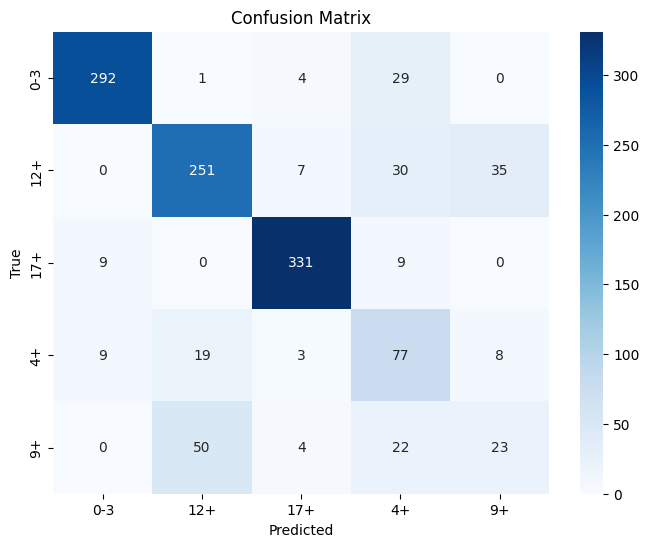

              precision    recall  f1-score   support

         0-3       0.94      0.90      0.92       326
         12+       0.78      0.78      0.78       323
         17+       0.95      0.95      0.95       349
          4+       0.46      0.66      0.54       116
          9+       0.35      0.23      0.28        99

    accuracy                           0.80      1213
   macro avg       0.70      0.70      0.69      1213
weighted avg       0.81      0.80      0.80      1213



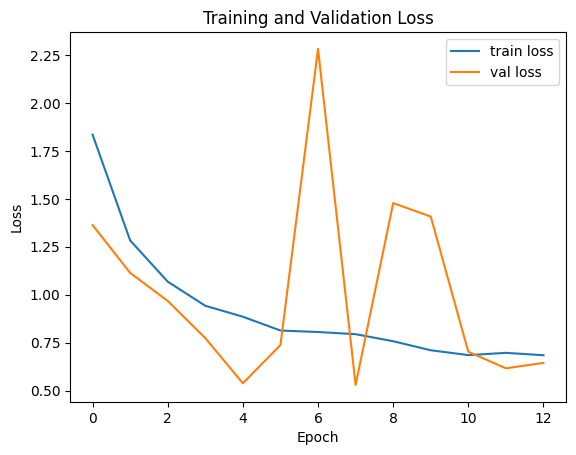

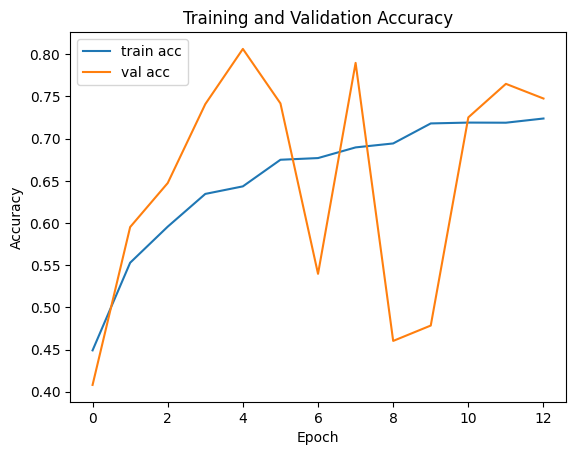

In [9]:

# Define the batch size
batch_size = 32


# Pixel Value Normalization , it rescales the pixel values so that they fall within the range [0, 1].
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True) # Adjust this 
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data Generators
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size=IMAGE_SIZE,
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

validation_set = validation_datagen.flow_from_directory(valid_path,
                                                       target_size=IMAGE_SIZE,
                                                       batch_size=batch_size,
                                                       class_mode='categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                           target_size=IMAGE_SIZE,
                                           batch_size=batch_size,
                                           class_mode='categorical')

#---------------------------------------------------------------------------------


# Building the model
input_layer = Input(shape=(224, 224, 3))

# Convolutional Block 1
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

# Flatten and Fully Connected Layers with Dropout
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.7)(x)

# Output Layer
output_layer = Dense(5, activation='softmax')(x)  # Assuming 5 classes

# Create the model
model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

# Compiling the Model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()
#---------------------------------------------------------------------------------

# Early Stopping and Learning Rate Schedule  May delete it?
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=1e-7)

#---------------------------------------------------------------------------------

epochs = 30
history = model.fit(
    training_set,
    steps_per_epoch=len(training_set),
    validation_data=validation_set,
    validation_steps=len(validation_set),
    epochs=epochs,
    callbacks=[early_stopping, reduce_lr]
)
#---------------------------------------------------------------------------------
# Evaluate the Model on the Test Set
test_loss, test_acc = model.evaluate(test_set, steps=len(test_set))
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')



# Model Evaluation and Confusion Matrix

# Initialize variables to store true and predicted labels
true_labels = []
predicted_labels = []

# Loop through the test set and make predictions
for i in range(len(test_set)):
    images, labels = test_set[i]
    true_labels.extend(np.argmax(labels, axis=1))
    predictions = model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))

# Convert the lists to numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Create the confusion matrix
confusion_mtx = confusion_matrix(true_labels, predicted_labels)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Generate a classification report
report = classification_report(true_labels, predicted_labels, target_names=class_labels)
print(report)

#---------------------------------------------------------------------------------

# Plotting Loss Curves
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

# Plotting Accuracy Curves
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()

#---------------------------------------------------------------------------------

# Saving the Model
model.save('FE5.h5')



# Results = No need for data augmention , worst

# ------------------------- 
## Experiment  5 , use regularizer

mod
Found 7039 images belonging to 5 classes.
Found 1208 images belonging to 5 classes.
Found 1213 images belonging to 5 classes.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 401408)            0         
                                                                 
 dense (Dense)               (None, 128)               513803

2023-10-16 13:18:37.673911: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


220/220 [==============================] - ETA: 0s - loss: 6.7479 - accuracy: 0.4431

2023-10-16 13:20:42.962705: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


220/220 [==============================] - 131s 590ms/step - loss: 6.7479 - accuracy: 0.4431 - val_loss: 3.6600 - val_accuracy: 0.3825 - lr: 0.0010
Epoch 2/30
220/220 [==============================] - 130s 588ms/step - loss: 3.3480 - accuracy: 0.5354 - val_loss: 3.3092 - val_accuracy: 0.5190 - lr: 0.0010
Epoch 3/30
220/220 [==============================] - 133s 604ms/step - loss: 2.4880 - accuracy: 0.6069 - val_loss: 2.3570 - val_accuracy: 0.4702 - lr: 0.0010
Epoch 4/30
220/220 [==============================] - 127s 578ms/step - loss: 2.2808 - accuracy: 0.6509 - val_loss: 2.0084 - val_accuracy: 0.7550 - lr: 0.0010
Epoch 5/30
220/220 [==============================] - 126s 574ms/step - loss: 1.9922 - accuracy: 0.6536 - val_loss: 3.2572 - val_accuracy: 0.2856 - lr: 0.0010
Epoch 6/30
220/220 [==============================] - 127s 576ms/step - loss: 2.0802 - accuracy: 0.6627 - val_loss: 2.8152 - val_accuracy: 0.5116 - lr: 0.0010
Epoch 7/30
220/220 [==============================] - 126

2023-10-16 14:22:31.747022: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


38/38 [==============================] - 5s 142ms/step - loss: 0.5986 - accuracy: 0.8137
Test Loss: 0.5986387729644775
Test Accuracy: 0.8136850595474243
1/1 [==============================] - 0s 196ms/step


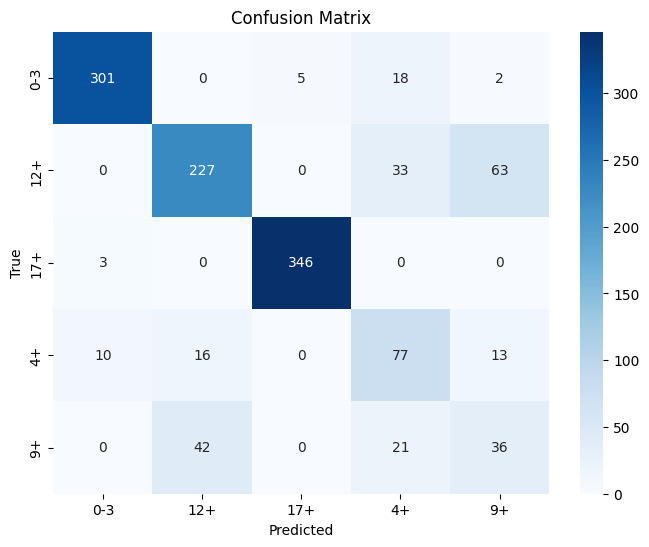

              precision    recall  f1-score   support

         0-3       0.96      0.92      0.94       326
         12+       0.80      0.70      0.75       323
         17+       0.99      0.99      0.99       349
          4+       0.52      0.66      0.58       116
          9+       0.32      0.36      0.34        99

    accuracy                           0.81      1213
   macro avg       0.71      0.73      0.72      1213
weighted avg       0.83      0.81      0.82      1213



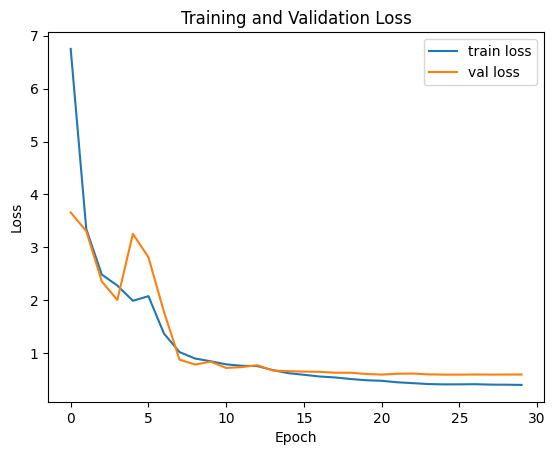

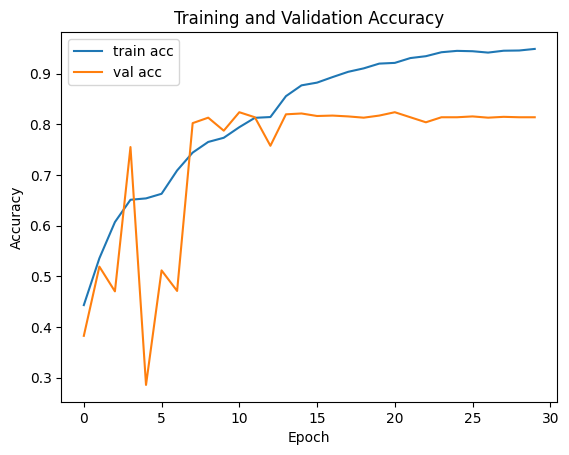

In [2]:

from tensorflow.keras.regularizers import l2
print('mod')
# Define the batch size
batch_size = 32


# Pixel Value Normalization , it rescales the pixel values so that they fall within the range [0, 1].
train_datagen = ImageDataGenerator(rescale=1./255) # Adjust this 
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data Generators
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size=IMAGE_SIZE,
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

validation_set = validation_datagen.flow_from_directory(valid_path,
                                                       target_size=IMAGE_SIZE,
                                                       batch_size=batch_size,
                                                       class_mode='categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                           target_size=IMAGE_SIZE,
                                           batch_size=batch_size,
                                           class_mode='categorical')

#---------------------------------------------------------------------------------


# Building the model
input_layer = Input(shape=(224, 224, 3))

# Convolutional Block 1
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

# Flatten and Fully Connected Layers with Dropout
x = Flatten()(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)  # Adjust this
x = BatchNormalization()(x)
x = Dropout(0.7)(x)

# Output Layer
output_layer = Dense(5, activation='softmax')(x)  

# Create the model
model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

# Compiling the Model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()
#---------------------------------------------------------------------------------

# Early Stopping and Learning Rate Schedule  May delete it?
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=1e-7)

#---------------------------------------------------------------------------------

epochs = 30
history = model.fit(
    training_set,
    steps_per_epoch=len(training_set),
    validation_data=validation_set,
    validation_steps=len(validation_set),
    epochs=epochs,
    callbacks=[early_stopping, reduce_lr]
)
#---------------------------------------------------------------------------------
# Evaluate the Model on the Test Set
test_loss, test_acc = model.evaluate(test_set, steps=len(test_set))
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')



# Model Evaluation and Confusion Matrix

# Initialize variables to store true and predicted labels
true_labels = []
predicted_labels = []

# Loop through the test set and make predictions
for i in range(len(test_set)):
    images, labels = test_set[i]
    true_labels.extend(np.argmax(labels, axis=1))
    predictions = model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))

# Convert the lists to numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Create the confusion matrix
confusion_mtx = confusion_matrix(true_labels, predicted_labels)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Generate a classification report
report = classification_report(true_labels, predicted_labels, target_names=class_labels)
print(report)

#---------------------------------------------------------------------------------

# Plotting Loss Curves
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

# Plotting Accuracy Curves
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()

#---------------------------------------------------------------------------------

# Saving the Model
model.save('FE6.h5') 



# Results= Better one, more correct predictions

# ---------------------------------------------------------------------
# Experiment 6 ,Use 64 in cov2d, then 128 

Found 7039 images belonging to 5 classes.
Found 1208 images belonging to 5 classes.
Found 1213 images belonging to 5 classes.


Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization_16 (Bat  (None, 224, 224, 64)     256       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 flatten_8 (Flatten)         (None, 802816)            0         
                                                                 
 dense_16 (Dense)            (None, 128)               1027

2023-10-16 06:36:34.900641: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


220/220 [==============================] - ETA: 0s - loss: 1.7239 - accuracy: 0.4881

2023-10-16 06:40:27.803411: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


220/220 [==============================] - 242s 1s/step - loss: 1.7239 - accuracy: 0.4881 - val_loss: 1.5108 - val_accuracy: 0.3013 - lr: 0.0010
Epoch 2/30
220/220 [==============================] - 234s 1s/step - loss: 1.0640 - accuracy: 0.6191 - val_loss: 0.9302 - val_accuracy: 0.6697 - lr: 0.0010
Epoch 3/30
220/220 [==============================] - 237s 1s/step - loss: 1.0479 - accuracy: 0.5982 - val_loss: 0.8805 - val_accuracy: 0.6805 - lr: 0.0010
Epoch 4/30
220/220 [==============================] - 238s 1s/step - loss: 0.8661 - accuracy: 0.6504 - val_loss: 0.6023 - val_accuracy: 0.7798 - lr: 0.0010
Epoch 5/30
220/220 [==============================] - 234s 1s/step - loss: 0.7565 - accuracy: 0.6998 - val_loss: 0.7079 - val_accuracy: 0.7425 - lr: 0.0010
Epoch 6/30
220/220 [==============================] - 234s 1s/step - loss: 0.6913 - accuracy: 0.7217 - val_loss: 0.7672 - val_accuracy: 0.6904 - lr: 0.0010
Epoch 7/30
220/220 [==============================] - 238s 1s/step - loss: 

2023-10-16 08:29:19.383221: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


38/38 [==============================] - 9s 222ms/step - loss: 0.4535 - accuracy: 0.8261
Test Loss: 0.45352059602737427
Test Accuracy: 0.8260511159896851
1/1 [==============================] - 0s 275ms/step


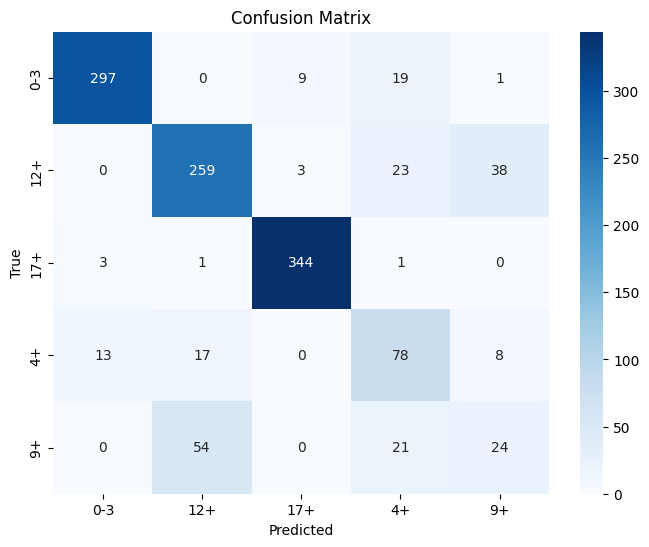

              precision    recall  f1-score   support

         0-3       0.95      0.91      0.93       326
         12+       0.78      0.80      0.79       323
         17+       0.97      0.99      0.98       349
          4+       0.55      0.67      0.60       116
          9+       0.34      0.24      0.28        99

    accuracy                           0.83      1213
   macro avg       0.72      0.72      0.72      1213
weighted avg       0.82      0.83      0.82      1213



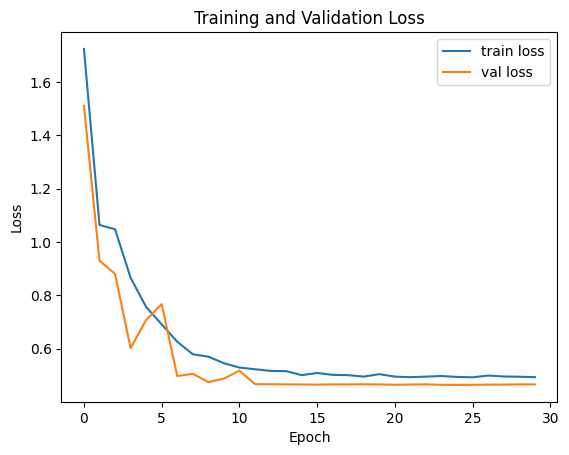

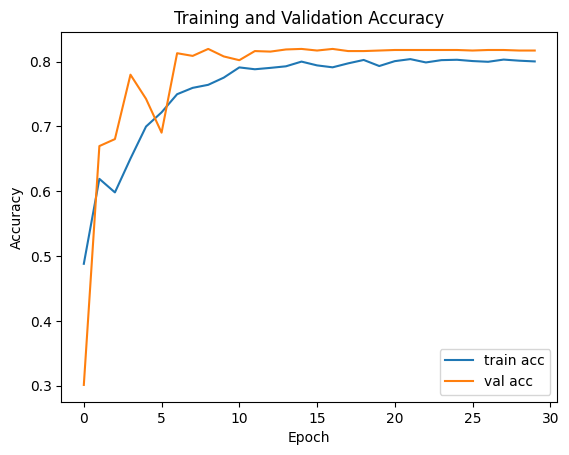

In [11]:

# Define the batch size
batch_size = 32


# Pixel Value Normalization , it rescales the pixel values so that they fall within the range [0, 1].
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data Generators
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size=IMAGE_SIZE,
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

validation_set = validation_datagen.flow_from_directory(valid_path,
                                                       target_size=IMAGE_SIZE,
                                                       batch_size=batch_size,
                                                       class_mode='categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                           target_size=IMAGE_SIZE,
                                           batch_size=batch_size,
                                           class_mode='categorical')

#---------------------------------------------------------------------------------


# Building the model
input_layer = Input(shape=(224, 224, 3))

# Convolutional Block 1
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)  # ************************** adjust this ****************************
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

# Flatten and Fully Connected Layers with Dropout
x = Flatten()(x)
x = Dense(128, activation='relu')(x) 
x = BatchNormalization()(x)
x = Dropout(0.7)(x)

# Output Layer
output_layer = Dense(5, activation='softmax')(x)  # Assuming 5 classes

# Create the model
model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

# Compiling the Model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()
#---------------------------------------------------------------------------------

# Early Stopping and Learning Rate Schedule  May delete it?
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=1e-7)

#---------------------------------------------------------------------------------

epochs = 30
history = model.fit(
    training_set,
    steps_per_epoch=len(training_set),
    validation_data=validation_set,
    validation_steps=len(validation_set),
    epochs=epochs,
    callbacks=[early_stopping, reduce_lr]
)

#---------------------------------------------------------------------------------
# Evaluate the Model on the Test Set
test_loss, test_acc = model.evaluate(test_set, steps=len(test_set))
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')



# Model Evaluation and Confusion Matrix

# Initialize variables to store true and predicted labels
true_labels = []
predicted_labels = []

# Loop through the test set and make predictions
for i in range(len(test_set)):
    images, labels = test_set[i]
    true_labels.extend(np.argmax(labels, axis=1))
    predictions = model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))

# Convert the lists to numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Create the confusion matrix
confusion_mtx = confusion_matrix(true_labels, predicted_labels)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Generate a classification report
report = classification_report(true_labels, predicted_labels, target_names=class_labels)
print(report)

#---------------------------------------------------------------------------------

# Plotting Loss Curves
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

# Plotting Accuracy Curves
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()

#---------------------------------------------------------------------------------

# Saving the Model
model.save('FE7.h5')



# Results= Bad since the validation accuracy is higher

## 2nd 128 

Found 7039 images belonging to 5 classes.
Found 1208 images belonging to 5 classes.
Found 1213 images belonging to 5 classes.


Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_9 (Conv2D)           (None, 224, 224, 128)     3584      
                                                                 
 batch_normalization_18 (Bat  (None, 224, 224, 128)    512       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 112, 112, 128)    0         
 2D)                                                             
                                                                 
 flatten_9 (Flatten)         (None, 1605632)           0         
                                                                 
 dense_18 (Dense)            (None, 128)               2055

2023-10-16 08:29:41.173391: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


220/220 [==============================] - ETA: 0s - loss: 1.7381 - accuracy: 0.4796

2023-10-16 08:39:05.795055: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


220/220 [==============================] - 582s 3s/step - loss: 1.7381 - accuracy: 0.4796 - val_loss: 1.3222 - val_accuracy: 0.3932 - lr: 0.0010
Epoch 2/30
220/220 [==============================] - 581s 3s/step - loss: 1.0867 - accuracy: 0.6085 - val_loss: 1.7727 - val_accuracy: 0.4454 - lr: 0.0010
Epoch 3/30
220/220 [==============================] - 562s 3s/step - loss: 0.8983 - accuracy: 0.6596 - val_loss: 0.6323 - val_accuracy: 0.7839 - lr: 0.0010
Epoch 4/30
220/220 [==============================] - 555s 3s/step - loss: 0.7280 - accuracy: 0.7039 - val_loss: 0.6336 - val_accuracy: 0.7409 - lr: 0.0010
Epoch 5/30
220/220 [==============================] - 550s 2s/step - loss: 0.6985 - accuracy: 0.7115 - val_loss: 1.1280 - val_accuracy: 0.5364 - lr: 0.0010
Epoch 6/30
220/220 [==============================] - 606s 3s/step - loss: 0.5962 - accuracy: 0.7541 - val_loss: 0.4805 - val_accuracy: 0.8022 - lr: 1.0000e-04
Epoch 7/30
220/220 [==============================] - 585s 3s/step - lo

2023-10-16 10:49:44.431105: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


38/38 [==============================] - 17s 431ms/step - loss: 0.4164 - accuracy: 0.8351
Test Loss: 0.4163624346256256
Test Accuracy: 0.8351195454597473
1/1 [==============================] - 0s 457ms/step


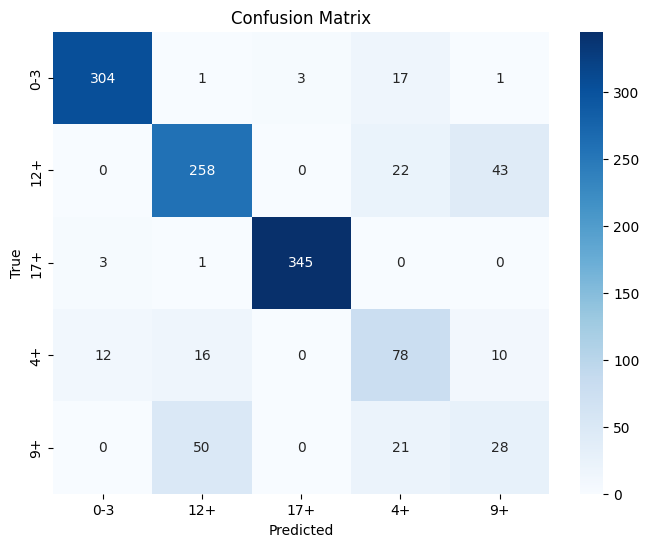

              precision    recall  f1-score   support

         0-3       0.95      0.93      0.94       326
         12+       0.79      0.80      0.80       323
         17+       0.99      0.99      0.99       349
          4+       0.57      0.67      0.61       116
          9+       0.34      0.28      0.31        99

    accuracy                           0.84      1213
   macro avg       0.73      0.74      0.73      1213
weighted avg       0.83      0.84      0.83      1213



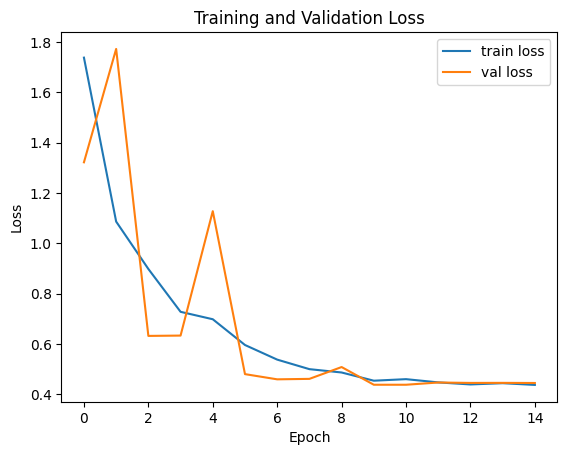

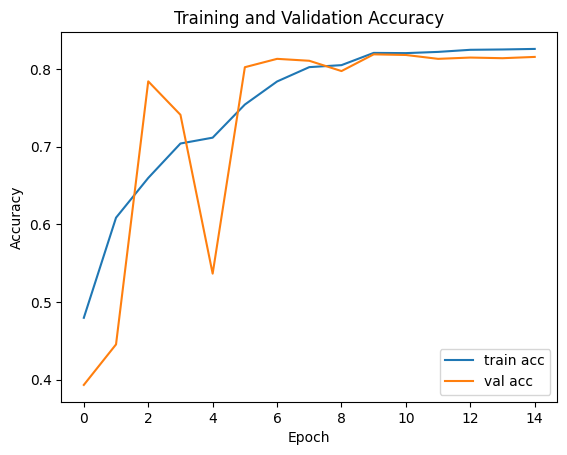

In [ ]:

# Define the batch size
batch_size = 32


# Pixel Value Normalization , it rescales the pixel values so that they fall within the range [0, 1].
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data Generators
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size=IMAGE_SIZE,
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

validation_set = validation_datagen.flow_from_directory(valid_path,
                                                       target_size=IMAGE_SIZE,
                                                       batch_size=batch_size,
                                                       class_mode='categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                           target_size=IMAGE_SIZE,
                                           batch_size=batch_size,
                                           class_mode='categorical')

#---------------------------------------------------------------------------------


# Building the model
input_layer = Input(shape=(224, 224, 3))

# Convolutional Block 1
x = Conv2D(128, (3, 3), activation='relu', padding='same')(input_layer)  # ************************** adjust this ****************************
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

# Flatten and Fully Connected Layers with Dropout
x = Flatten()(x)
x = Dense(128, activation='relu')(x) 
x = BatchNormalization()(x)
x = Dropout(0.7)(x)

# Output Layer
output_layer = Dense(5, activation='softmax')(x)  # Assuming 5 classes

# Create the model
model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

# Compiling the Model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()
#---------------------------------------------------------------------------------

# Early Stopping and Learning Rate Schedule  May delete it?
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=1e-7)

#---------------------------------------------------------------------------------

epochs = 30
history = model.fit(
    training_set,
    steps_per_epoch=len(training_set),
    validation_data=validation_set,
    validation_steps=len(validation_set),
    epochs=epochs,
    callbacks=[early_stopping, reduce_lr]
)

#---------------------------------------------------------------------------------
# Evaluate the Model on the Test Set
test_loss, test_acc = model.evaluate(test_set, steps=len(test_set))
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')



# Model Evaluation and Confusion Matrix

# Initialize variables to store true and predicted labels
true_labels = []
predicted_labels = []

# Loop through the test set and make predictions
for i in range(len(test_set)):
    images, labels = test_set[i]
    true_labels.extend(np.argmax(labels, axis=1))
    predictions = model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))

# Convert the lists to numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Create the confusion matrix
confusion_mtx = confusion_matrix(true_labels, predicted_labels)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Generate a classification report
report = classification_report(true_labels, predicted_labels, target_names=class_labels)
print(report)

#---------------------------------------------------------------------------------

# Plotting Loss Curves
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

# Plotting Accuracy Curves
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()

#---------------------------------------------------------------------------------

# Saving the Model
model.save('FE8.h5')

#maybe the best one 



# Results= not good since the accuracy of validatin is higher with a large period of time

# 3rd Conv2d(16)

DO It
Found 7039 images belonging to 5 classes.
Found 1208 images belonging to 5 classes.
Found 1213 images belonging to 5 classes.


Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_10 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 batch_normalization_20 (Bat  (None, 224, 224, 16)     64        
 chNormalization)                                                
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 112, 112, 16)     0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 200704)            0         
                                                                 
 dense_20 (Dense)            (None, 128)               256

2023-10-16 10:50:22.234182: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


220/220 [==============================] - ETA: 0s - loss: 1.6326 - accuracy: 0.4910

2023-10-16 10:50:58.541239: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


220/220 [==============================] - 38s 170ms/step - loss: 1.6326 - accuracy: 0.4910 - val_loss: 1.0679 - val_accuracy: 0.7318 - lr: 0.0010
Epoch 2/30
220/220 [==============================] - 37s 168ms/step - loss: 1.0395 - accuracy: 0.6191 - val_loss: 0.8909 - val_accuracy: 0.6614 - lr: 0.0010
Epoch 3/30
220/220 [==============================] - 37s 168ms/step - loss: 0.7233 - accuracy: 0.7136 - val_loss: 0.6592 - val_accuracy: 0.7682 - lr: 0.0010
Epoch 4/30
220/220 [==============================] - 37s 167ms/step - loss: 0.6168 - accuracy: 0.7464 - val_loss: 0.4909 - val_accuracy: 0.8113 - lr: 0.0010
Epoch 5/30
220/220 [==============================] - 37s 167ms/step - loss: 0.5551 - accuracy: 0.7789 - val_loss: 0.5284 - val_accuracy: 0.8013 - lr: 0.0010
Epoch 6/30
220/220 [==============================] - 37s 167ms/step - loss: 0.5033 - accuracy: 0.8010 - val_loss: 0.5149 - val_accuracy: 0.7839 - lr: 0.0010
Epoch 7/30
220/220 [==============================] - 37s 167ms

2023-10-16 10:57:45.638181: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


38/38 [==============================] - 2s 45ms/step - loss: 0.4506 - accuracy: 0.8137
Test Loss: 0.45063745975494385
Test Accuracy: 0.8136850595474243
1/1 [==============================] - 0s 94ms/step


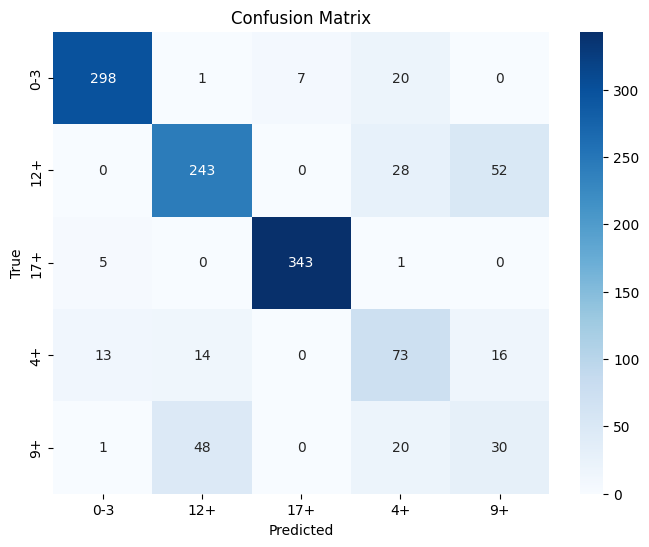

              precision    recall  f1-score   support

         0-3       0.94      0.91      0.93       326
         12+       0.79      0.75      0.77       323
         17+       0.98      0.98      0.98       349
          4+       0.51      0.63      0.57       116
          9+       0.31      0.30      0.30        99

    accuracy                           0.81      1213
   macro avg       0.71      0.72      0.71      1213
weighted avg       0.82      0.81      0.82      1213



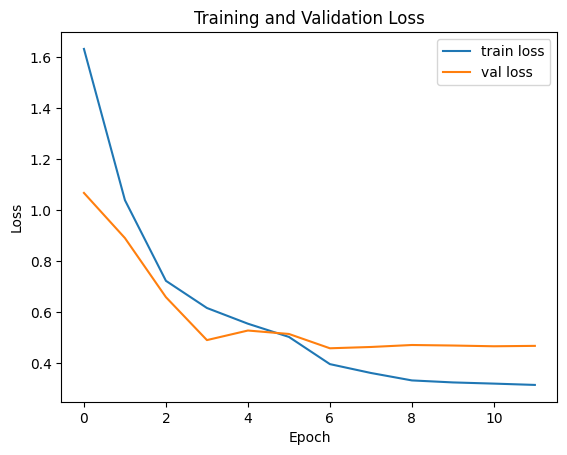

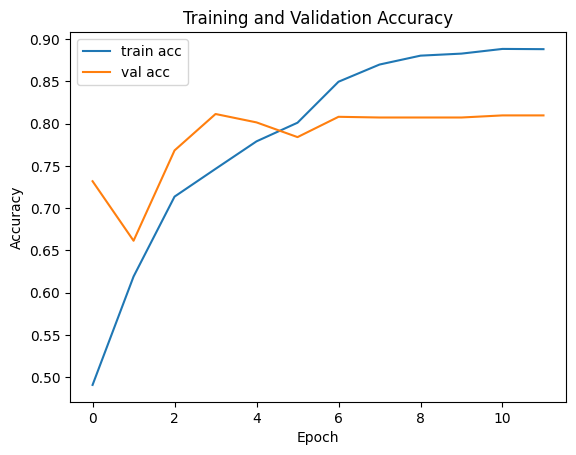

DOne


In [13]:

# Define the batch size
batch_size = 32
print("DO It")

# Pixel Value Normalization , it rescales the pixel values so that they fall within the range [0, 1].
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data Generators
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size=IMAGE_SIZE,
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

validation_set = validation_datagen.flow_from_directory(valid_path,
                                                       target_size=IMAGE_SIZE,
                                                       batch_size=batch_size,
                                                       class_mode='categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                           target_size=IMAGE_SIZE,
                                           batch_size=batch_size,
                                           class_mode='categorical')

#---------------------------------------------------------------------------------


# Building the model
input_layer = Input(shape=(224, 224, 3))

# Convolutional Block 1
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer)  # ************************** adjust this ****************************
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

# Flatten and Fully Connected Layers with Dropout
x = Flatten()(x)
x = Dense(128, activation='relu')(x) 
x = BatchNormalization()(x)
x = Dropout(0.7)(x)

# Output Layer
output_layer = Dense(5, activation='softmax')(x)  # Assuming 5 classes

# Create the model
model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

# Compiling the Model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()
#---------------------------------------------------------------------------------

# Early Stopping and Learning Rate Schedule  May delete it?
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=1e-7)

#---------------------------------------------------------------------------------

epochs = 30
history = model.fit(
    training_set,
    steps_per_epoch=len(training_set),
    validation_data=validation_set,
    validation_steps=len(validation_set),
    epochs=epochs,
    callbacks=[early_stopping, reduce_lr]
)

#---------------------------------------------------------------------------------
# Evaluate the Model on the Test Set
test_loss, test_acc = model.evaluate(test_set, steps=len(test_set))
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')



# Model Evaluation and Confusion Matrix

# Initialize variables to store true and predicted labels
true_labels = []
predicted_labels = []

# Loop through the test set and make predictions
for i in range(len(test_set)):
    images, labels = test_set[i]
    true_labels.extend(np.argmax(labels, axis=1))
    predictions = model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))

# Convert the lists to numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Create the confusion matrix
confusion_mtx = confusion_matrix(true_labels, predicted_labels)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Generate a classification report
report = classification_report(true_labels, predicted_labels, target_names=class_labels)
print(report)

#---------------------------------------------------------------------------------

# Plotting Loss Curves
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

# Plotting Accuracy Curves
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()

#---------------------------------------------------------------------------------

# Saving the Model
model.save('FE9.h5')
print("DOne")



# Results= intermediate

### ---------------------------------------------------------------------

### The best untl Now is : droup out = 0.7 , batch size= no big change 32 less overfitting, data augmention : No need, regulazier :yes , cov2D:32 


# The best is the one with regularizer since it has the most correct class prediction and good accuracy.